Importing packages 

In [2]:
import pandas as pd
# Mount data from drive
#from google.colab import drive
#drive.mount('/content/drive')

Reading training and testing datasets 

In [3]:
#x_train = pd.read_csv("/content/drive/MyDrive/csv files /x_train_3.csv")
x_train = pd.read_csv("x_train_3.csv")

x_train = x_train[['i','ii','v2']]
x_train.head()

,i,ii,v2
0,0.059091,-0.049677,0.052259
1,0.066293,-0.052948,0.048294
2,0.072327,-0.055901,0.044217
3,0.076289,-0.058298,0.039935
4,0.077742,-0.060031,0.035389


In [4]:
#y_train = pd.read_csv("/content/drive/MyDrive/csv files /y_train_3.csv")
y_train = pd.read_csv("y_train_3.csv")
y_train=y_train[['v1','v3','v4','v5','v6']]
y_train.head()

,v1,v3,v4,v5,v6
0,0.008806,0.020865,-0.001003,-0.031425,-0.045720
1,0.006531,0.018781,-0.003726,-0.034163,-0.047625
2,0.004191,0.016538,-0.006406,-0.036766,-0.049445
3,0.001736,0.014033,-0.009009,-0.039114,-0.051129
4,-0.000859,0.011245,-0.011506,-0.041119,-0.052688


In [6]:
#x_test = pd.read_csv("/content/drive/MyDrive/csv files /x_test_3.csv")
x_test = pd.read_csv("x_test_3.csv")
x_test=x_test[['i','ii','v2']]
x_test.head()

,i,ii,v2
0,-0.028925,0.093669,-0.108403
1,-0.019101,0.107135,-0.093574
2,-0.009049,0.121814,-0.078456
3,0.001363,0.138575,-0.062818
4,0.012087,0.157683,-0.046544


In [7]:
#y_test = pd.read_csv("/content/drive/MyDrive/csv files /y_test_3.csv")
y_test = pd.read_csv("y_test_3.csv")
y_test=y_test[['v1','v3','v4','v5','v6']]
y_test.head()

,v1,v3,v4,v5,v6
0,-0.029438,-0.082027,-0.068431,-0.029733,-0.003349
1,-0.044847,-0.065392,-0.056687,-0.020393,0.007857
2,-0.060703,-0.048238,-0.043725,-0.009981,0.019319
3,-0.077202,-0.030193,-0.028662,0.002287,0.031176
4,-0.094126,-0.011143,-0.011190,0.016702,0.043375


Importing packages 

In [8]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.9.1'

In [9]:
import tensorflow.keras as keras

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import r2_score,mean_squared_error
import math
from math import sqrt
import matplotlib.pyplot as plt

In [11]:
sample_size = x_train.shape[0] # number of samples in train set
print(x_train.shape[0])
time_steps  = x_train.shape[1] # number of features in train set
input_dimension = 1   

2400000


In [12]:
x_train_reshaped = np.asanyarray(x_train).reshape(sample_size,time_steps,input_dimension) #Reshaping training dataset into a numpy array 


In [13]:
x_test= np.asanyarray(x_test)      #Reshaping testing dataset into a numpy array 
x_test_resahped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test_resahped

array([[[-0.02892515],
        [ 0.09366916],
        [-0.10840253]],

       [[-0.01910105],
        [ 0.10713535],
        [-0.09357421]],

       [[-0.00904854],
        [ 0.1218138 ],
        [-0.07845593]],

       ...,

       [[-0.07377999],
        [-0.12408764],
        [-0.10030488]],

       [[-0.07485843],
        [-0.122511  ],
        [-0.10214065]],

       [[-0.07598774],
        [-0.11970934],
        [-0.10377667]]])

In [14]:
y_train= np.asanyarray(y_train) #reshaping training dataset into a numpy array 

Defining and setting the model parameters 

In [15]:
model = Sequential()
model.add(Conv1D(filters=10,kernel_size=2, activation='sigmoid', input_shape=(3,1)))

model.add(Flatten())
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(5, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 10)             30        
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 15)                315       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train_reshaped ,y_train,verbose = 1,epochs =50, batch_size =10000) #training the model with 50 epochs and 1000 for the batch size 

Epoch 1/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0487
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0361
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0207
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0141
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0127
Epoch 6/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0121
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0117
Epoch 8/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0114
Epoch 9/50
240/240 [==============================] - 1s 4ms/step - loss: 0.0111
Epoch 10/50
240/240 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 11/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0107
Epoch 12/50
240/240 [==============================] - 1s 3ms/step - loss: 0.0105
Epoch 13/50
240/240 [====

Predictions on testing dataset


In [18]:
y_pred = model.predict(x_test_resahped) #getting predictions 

18750/18750 [==============================] - 16s 828us/step


In [19]:
y_pred = pd.DataFrame(data=y_pred) #converting the final predictions array to a data frame 
y_pred.head()

,0,1,2,3,4
0,-0.045209,-0.106834,-0.057042,0.009199,0.028370
1,-0.045182,-0.088801,-0.039889,0.022773,0.038452
2,-0.045420,-0.070412,-0.021920,0.037234,0.049411
3,-0.046029,-0.051310,-0.002545,0.053217,0.061809
4,-0.047002,-0.031336,0.018513,0.070974,0.075863


Calculating the coorelation coefficient and RMSE scores 

In [26]:
#V1

v1=r2_score(y_test[['v1']],y_pred.iloc[:,0])
print('R square =' ,v1)
v1=math.sqrt(v1)
print('correlation_coef of v1= ',v1)

rmse_v1=sqrt(mean_squared_error(y_test[['v1']],y_pred.iloc[:,0]))
print('rmse_v1= ',rmse_v1)


R square = 0.816295428059225
correlation_coef of v1=  0.9034906906322969
rmse_v1=  0.09226014851560284


In [27]:
#V3

import math
from sklearn.metrics import r2_score, mean_squared_error

r2_v1=r2_score(y_test[['v3']],y_pred.iloc[:,1])
print('R square =' ,r2_v1)
r_v1=math.sqrt(r2_v1)
print('correlation_coef of v3= ',r_v1)
rmse_v3=sqrt(mean_squared_error(y_test[['v3']],y_pred.iloc[:,1]))
print('rmse_v3= ',rmse_v3)

R square = 0.8822498492316014
correlation_coef of v3=  0.9392815601466907
rmse_v3=  0.10036026560850365


In [28]:
#V4
import math
from sklearn.metrics import r2_score, mean_squared_error

v4=r2_score(y_test[['v4']],y_pred.iloc[:,2])
print('R square =' ,v4)

v4=math.sqrt(v4)
print('correlation_coef of v4= ',v4)

rmse_v4=sqrt(mean_squared_error(y_test[['v4']],y_pred.iloc[:,2]))
print('rmse_v4= ',rmse_v4)

R square = 0.6114484178541191
correlation_coef of v4=  0.7819516723264418
rmse_v4=  0.14204437506881268


In [31]:
#V5
import math
from sklearn.metrics import r2_score, mean_squared_error


v5=r2_score(y_test[['v5']],y_pred.iloc[:,3])
print('R square =' ,v5)

v5=math.sqrt(v4)
print('correlation_coef of v5= ',v5)


rmse_v5=sqrt(mean_squared_error(y_test[['v5']],y_pred.iloc[:,3]))
print('rmse_v5= ',rmse_v5)


R square = 0.6995070414100899
correlation_coef of v5=  0.8842803132075495
rmse_v5=  0.10075498792539028


In [32]:
#V6
import math
from sklearn.metrics import r2_score, mean_squared_error


v6=r2_score(y_test[['v6']],y_pred.iloc[:,4])
print('R square =' ,v6)

v6=math.sqrt(v6)
print('correlation_coef of v5= ',v6)


rmse_v6=sqrt(mean_squared_error(y_test[['v6']],y_pred.iloc[:,4]))
print('rmse_v6= ',rmse_v6)



R square = 0.7837800877749276
correlation_coef of v5=  0.8853135533667874
rmse_v6=  0.07020915276317552


V1 Visualization 



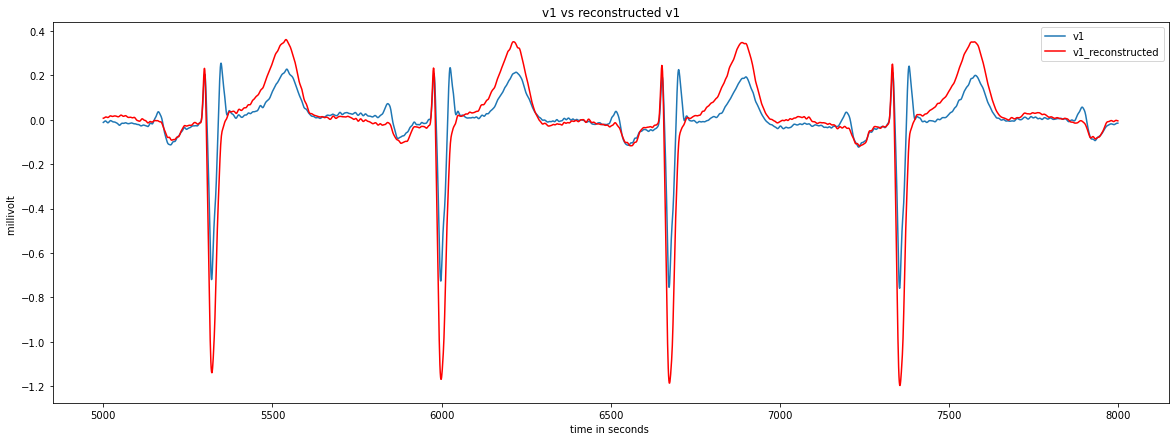

In [35]:
#V1 visualization 
plt.figure(figsize=(20,7))
plt.plot(y_test.iloc[5000:8000,0],label="v1")
plt.plot(y_pred.iloc[5000:8000,0],color='r',label="v1_reconstructed")
plt.title('v1 vs reconstructed v1')
plt.xlabel('time in seconds ') 
plt.ylabel('millivolt ') 
plt.legend()

V3 Visualization 


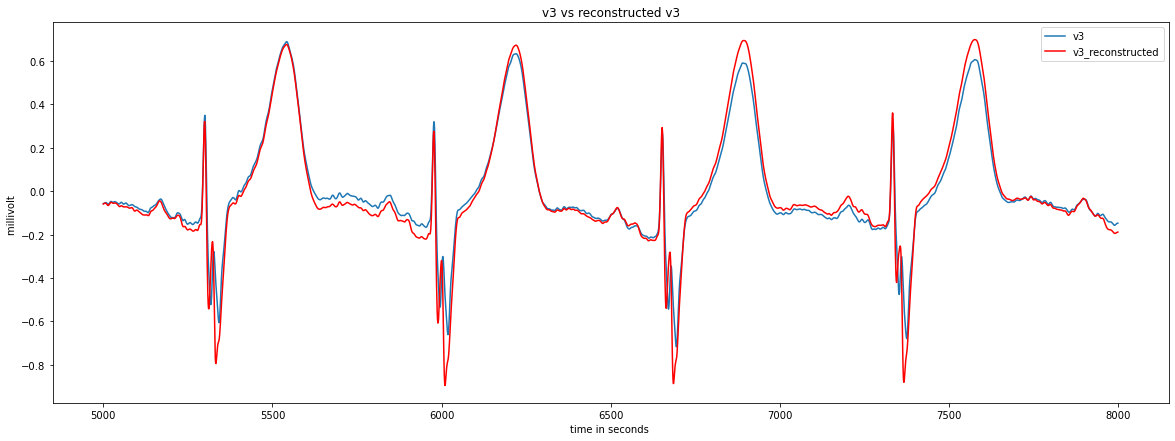

In [37]:
#V3 visualization 
plt.figure(figsize=(20,7))
plt.plot(y_test.iloc[5000:8000,1],label="v3")
plt.plot(y_pred.iloc[5000:8000,1],color='r',label="v3_reconstructed")
plt.title('v3 vs reconstructed v3')
plt.xlabel('time in seconds ') 
plt.ylabel('millivolt ') 
plt.legend()

V4 Visualization for the first patient

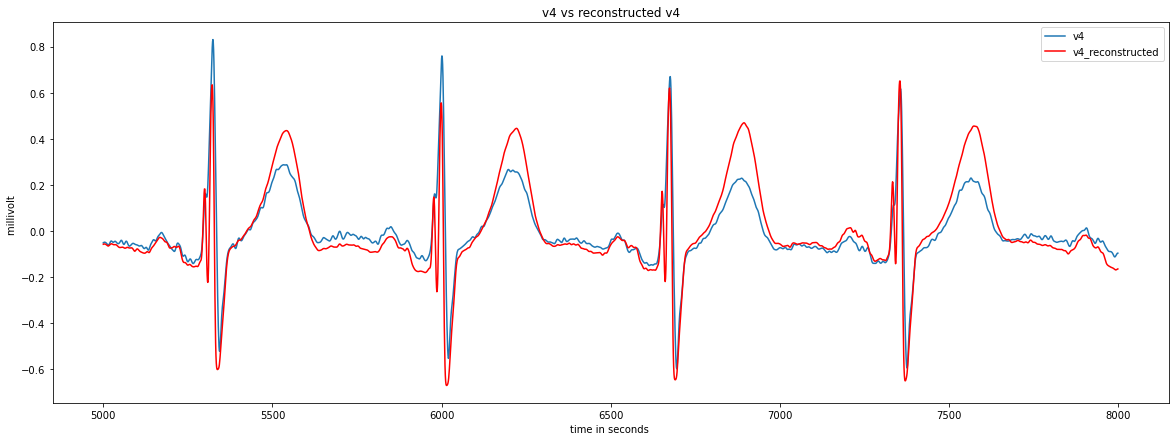

In [38]:
#V4 visulaization 
plt.figure(figsize=(20,7))
plt.plot(y_test.iloc[5000:8000,2],label="v4")
plt.plot(y_pred.iloc[5000:8000,2],color='r',label="v4_reconstructed")
plt.title('v4 vs reconstructed v4')
plt.legend()


plt.xlabel('time in seconds ') 
plt.ylabel('millivolt ') 
plt.legend()

V5 Visualization for the first patient 


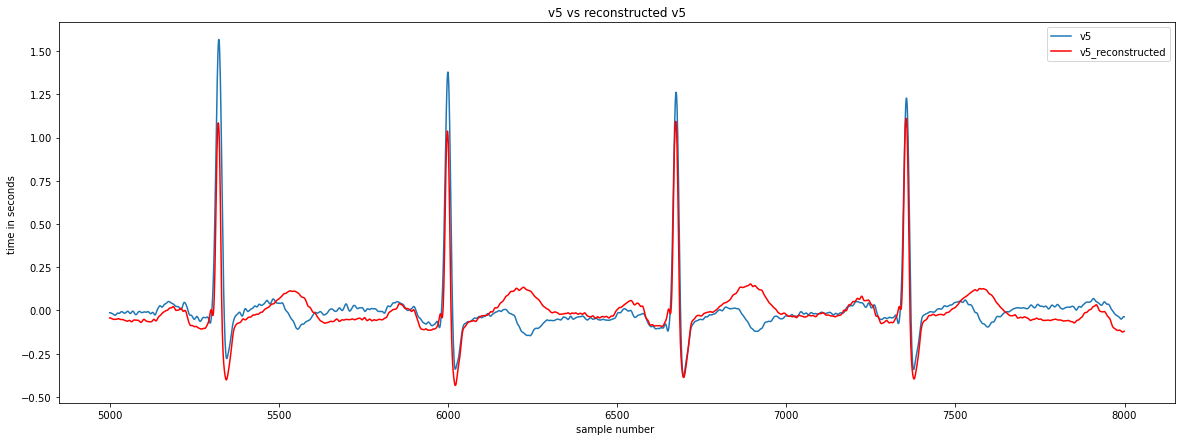

In [39]:
#V5 visualization 
plt.figure(figsize=(20,7))
plt.plot(y_test.iloc[5000:8000,3],label="v5")
plt.plot(y_pred.iloc[5000:8000,3],color='r',label="v5_reconstructed")
plt.title('v5 vs reconstructed v5')



plt.xlabel('sample number ') 
plt.ylabel('time in seconds ') 
plt.legend()

V6 Visualization for the first patient 


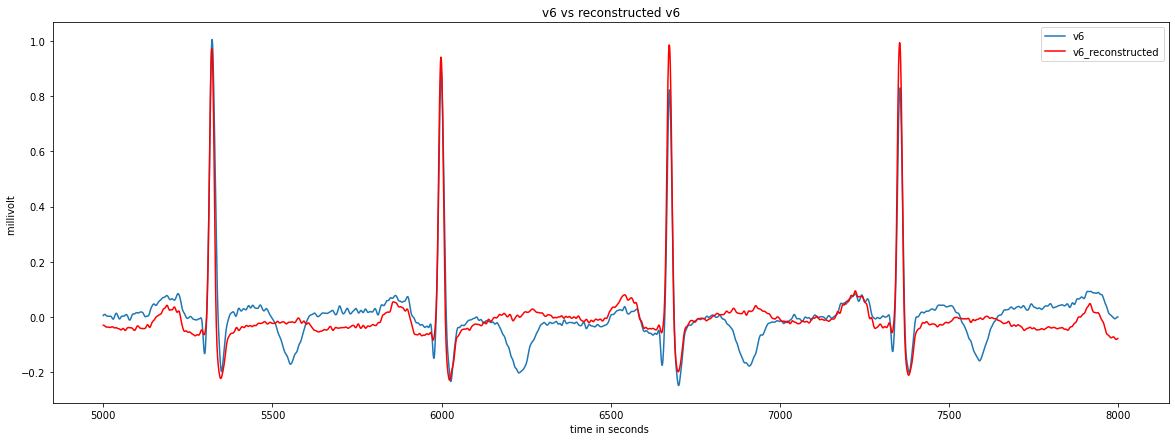

In [40]:
#V6 Visualization 
plt.figure(figsize=(20,7))
plt.plot(y_test.iloc[5000:8000,4],label="v6")
plt.plot(y_pred.iloc[5000:8000,4],color='r',label="v6_reconstructed")
plt.title('v6 vs reconstructed v6')



plt.xlabel('time in seconds ') 
plt.ylabel('millivolt ')
plt.legend() 

Predicting the data on training dataset 

In [41]:
y_pred_train = model.predict(x_train_reshaped) 

75000/75000 [==============================] - 68s 906us/step


In [42]:
y_pred_train = pd.DataFrame(data=y_pred_train)
y_pred.head()

,0,1,2,3,4
0,-0.045209,-0.106834,-0.057042,0.009199,0.028370
1,-0.045182,-0.088801,-0.039889,0.022773,0.038452
2,-0.045420,-0.070412,-0.021920,0.037234,0.049411
3,-0.046029,-0.051310,-0.002545,0.053217,0.061809
4,-0.047002,-0.031336,0.018513,0.070974,0.075863


In [43]:
y_train = pd.DataFrame(data=y_train)
y_train.head()

,0,1,2,3,4
0,0.008806,0.020865,-0.001003,-0.031425,-0.045720
1,0.006531,0.018781,-0.003726,-0.034163,-0.047625
2,0.004191,0.016538,-0.006406,-0.036766,-0.049445
3,0.001736,0.014033,-0.009009,-0.039114,-0.051129
4,-0.000859,0.011245,-0.011506,-0.041119,-0.052688


Calculating the coorelation coefficinet and RMSE on training dataset  

In [44]:
#V1
import math
from sklearn.metrics import r2_score, mean_squared_error



v1=r2_score(y_train.iloc[:,0],y_pred_train.iloc[:,0])
print('R square =' ,v1)
v1=math.sqrt(v1)
print('correlation_coef of v1= ',v1)
      
rmse_v1=math.sqrt(mean_squared_error(y_train.iloc[:,0],y_pred_train.iloc[:,0]))
print('rmse_v1= ',rmse_v1)

R square = 0.8658458084604582
correlation_coef of v1=  0.9305083602313621
rmse_v1=  0.0753400978707403


In [46]:
#V3
import math
from sklearn.metrics import r2_score, mean_squared_error


v3=r2_score(y_train.iloc[:,1],y_pred_train.iloc[:,1])
print('R square =' ,v3)
v3=math.sqrt(v3)
print('correlation_coef of v3= ',v3)
      
rmse_v3=sqrt(mean_squared_error(y_train.iloc[:,1],y_pred_train.iloc[:,1]))
print('rmse_v3= ',rmse_v3)




R square = 0.8793015009981822
correlation_coef of v3=  0.9377107768380303
rmse_v3=  0.10100105780933175


In [47]:
#V4
import math
from sklearn.metrics import r2_score, mean_squared_error

v4=r2_score(y_train.iloc[:,2],y_pred_train.iloc[:,2])
print('R square =' ,v4)

v4=math.sqrt(v4)
print('correlation_coef of v4= ',v4)

rmse_v4=sqrt(mean_squared_error(y_train.iloc[:,2],y_pred_train.iloc[:,2]))
print('rmse_v4= ',rmse_v4)

R square = 0.7051892439558499
correlation_coef of v4=  0.839755466761515
rmse_v4=  0.1281148320612049


In [48]:
#V5
import math
from sklearn.metrics import r2_score, mean_squared_error

v5=r2_score(y_train.iloc[:,3],y_pred_train.iloc[:,3])
print('R square =' ,v5)

v5=math.sqrt(v5)
print('correlation_coef of v5= ',v5)

rmse_v5=sqrt(mean_squared_error(y_train.iloc[:,3],y_pred_train.iloc[:,3]))
print('rmse_v5= ',rmse_v5)

R square = 0.6751580652676282
correlation_coef of v5=  0.8216800260853541
rmse_v5=  0.09607388080024495


In [49]:
#V6
import math
from sklearn.metrics import r2_score, mean_squared_error

v6=r2_score(y_train.iloc[:,4],y_pred_train.iloc[:,4])
print('R square =' ,v6)

v6=math.sqrt(v6)
print('correlation_coef of v6= ',v6)

rmse_v6=sqrt(mean_squared_error(y_train.iloc[:,4],y_pred_train.iloc[:,4]))
print('rmse_v6= ',rmse_v6)

R square = 0.7428511801284368
correlation_coef of v6=  0.8618881482700854
rmse_v6=  0.06906980803302105
